In [38]:
# openCV 버전확인
import cv2
cv2.__version__

'4.4.0'

#### 1. 이미지 로드하기

OpenCV 의 imread()를 사용합니다.

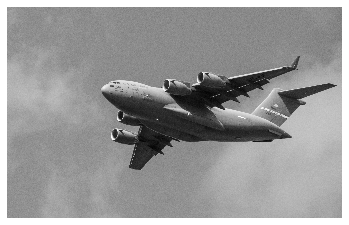

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image = cv2.imread('images/plane.jpg', cv2.IMREAD_GRAYSCALE)

# 맷플롯립을 사용하여 이미지를 출력합니다.
plt.imshow(image, cmap='gray'); plt.axis('off')
plt.show()

이미지는 하나의 __데이터__ .  
imread를 사용하면 이 데이터를 친숙한 데이터 타입인 __넘파이 배열__ 로 변환

In [40]:
type(image)

numpy.ndarray

In [41]:
# 행렬의 각 원소는 개별 픽셀에 해당
print(image)

print('행의 개수:', len(image[0]))
print('열의 개수:', len(image))

[[140 136 146 ... 132 139 134]
 [144 136 149 ... 142 124 126]
 [152 139 144 ... 121 127 134]
 ...
 [156 146 144 ... 157 154 151]
 [146 150 147 ... 156 158 157]
 [143 138 147 ... 156 157 157]]
행의 개수: 3600
열의 개수: 2270


In [42]:
# 각 원소가 의미하는 것은 픽셀의 강도.
# 0은 검정색, 255는 흰색을 의미.

image[0,0]

140

In [43]:
# gray scale일 때는 픽셀은 0~255 사이의 값으로 표현되지만
# 색이 있는 사진의 픽셀은 BGR 값 각각으로 표현

image_bgr = cv2.imread('images/plane.jpg', cv2.IMREAD_COLOR)

# 픽셀을 확인합니다.
image_bgr[0,0]

array([195, 144, 111], dtype=uint8)

__주의할점__ : OpenCV는 BGR순서로 색을 나타냄. 하지만 맷플롯립을 비롯한 다수의 이미지 애플리케이션은 RGB순서로 나타내기 때문에 변환작업이 필요함

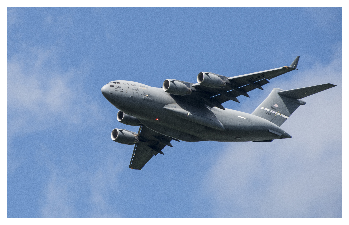

In [44]:
# RGB로 변환합니다.
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb); plt.axis('off')
plt.show()

#### 2. 이미지 저장하기
OpenCV의 imwrite()를 사용

In [45]:
image = cv2.imread('images/plane.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지를 저장합니다.
cv2.imwrite('images/plane_new.jpg', image)

True

imwrite는 에러나 확인 메시지 없이 저장하기 때문에 기존의 파일과 겹치는 파일명을 쓰지 않도록 주의할것

#### 3. 이미지 크기 변경하기

resize()를 이용

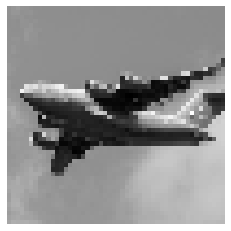

In [46]:
image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지 크기를 50x50 으로 바꿉니다.
image_50x50 = cv2.resize(image, (50,50))

# 이미지를 출력합니다.
plt.imshow(image_50x50, cmap='gray'); plt.axis('off')
plt.show()

__이미지 크기를 변경하는 이유__  
1. 다양한 사진을 특성으로 사용하려면 동일한 크기로 만들어야 함  -> 다만 이미지 크기를 표준화하면 행렬의 크기와 정보가 줄어듬  
2. 이미지가 너무 크면 메모리를 많이 차지하기 때문에 메모리 사용량을 줄이기 위해서 (32x32, 64x64, 96x96, 256x256 을 많이 사용)

#### 4. 이미지 자르기

배열 슬라이싱을 활용

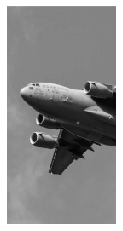

In [47]:
image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 열의 절반만 출력합니다.
image_cropped = image[:,:128]

plt.imshow(image_cropped, cmap = 'gray'); plt.axis('off')
plt.show()

#### 5. 이미지 흐리게 하기

blur() 이용.

이미지를 흐리게 하기 위해서는 kernel을 활용하여 각 픽셀을 주변 픽셀의 평균값으로 변환하면 됨  
__kernel__ : 주변 픽셀에 수행되는 연산

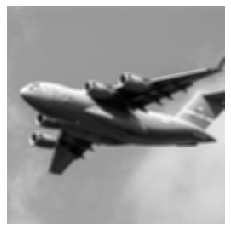

In [48]:
image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지를 흐리게 만듭니다.
image_blurry = cv2.blur(image, (5,5))

plt.imshow(image_blurry, cmap='gray'); plt.axis('off')
plt.show()

blur()에 매개변수로 (5,5)를 전달하여 주변 5*5 픽셀만 평균냈기 때문에 blur의 정도가 약함  
__튜플의 값을 크게 할 수록__ blur의 정도가 커짐

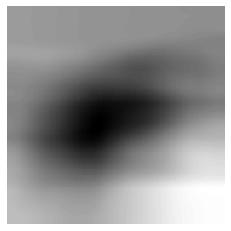

In [49]:
image_very_blurry = cv2.blur(image, (100,100))

plt.imshow(image_very_blurry, cmap='gray'); plt.axis('off')
plt.show()

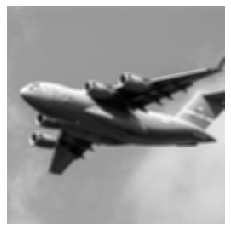

In [50]:
# 흐림 처리에 활용할 커널을 미리 만들어서 이미지에 직접 적용하는 것도 가능
kernel = np.ones((5,5)) / 25

# filter2D 함수로 커널을 이미지에 적용
image_kernel = cv2.filter2D(image, -1, kernel)

plt.imshow(image_kernel, cmap='gray'); plt.axis('off')
plt.show()

kernel의 크기는 (너비, 높이)로 지정. 이떄 blur 함수는 각 픽셀에 커널 개수의 역수를 곱하여 모두 더하여 중앙 픽셀의 값으로 설정  

[[0.0625]
 [0.25  ]
 [0.375 ]
 [0.25  ]
 [0.0625]] 

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]] 



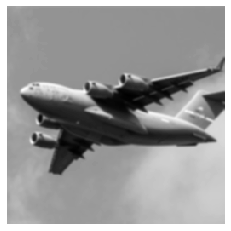

In [51]:
# getGaussianBlur() : 각 축 방향으로 가우시안 분포를 따르는 1차원 배열을 만든 다음 외적하여 커널 생성

gaus_vector = cv2.getGaussianKernel(5,0)
print(gaus_vector, '\n')

# 벡터를 외적하여 커널을 만듭니다.
gaus_kernel = np.outer(gaus_vector, gaus_vector)
print(gaus_kernel, '\n')

# 커널을 적용합니다.
image_kernel = cv2.filter2D(image, -1, gaus_kernel)

plt.imshow(image_kernel, cmap='gray'); plt.axis('off')
plt.show()

__외적__ : 두 벡터를 곱하여 행렬을 얻는 방식

#### 6. 이미지 선명하게 하기

대상 픽셀을 강조하는 커널을 만들어 filter2D를 사용하여 이미지에 적용  
blur와 반대로 중앙 픽셀을 부각하는 커널을 만들면 이미지의 경계선에서 대비가 두드러지게 나타남

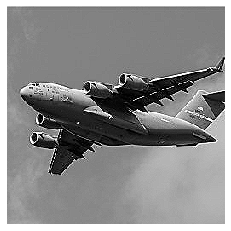

In [52]:
image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

kernel = np.array([[ 0,-1, 0],
                   [-1, 5,-1],
                   [ 0,-1, 0]])

# 커널을 이미지에 적용합니다.
image_sharp = cv2.filter2D(image, -1, kernel)

plt.imshow(image_sharp, cmap='gray'); plt.axis('off')
plt.show()

#### 7. 대비 높이기

OpenCV의 equalizeHist 함수를 사용하여 히스토그램 평활화 적용. (흑백 사진에서만 적용 가능)

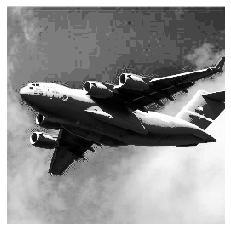

In [53]:
image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지 대비를 향상시킵니다.
image_enhanced = cv2.equalizeHist(image)

plt.imshow(image_enhanced, cmap='gray'); plt.axis('off')
plt.show()

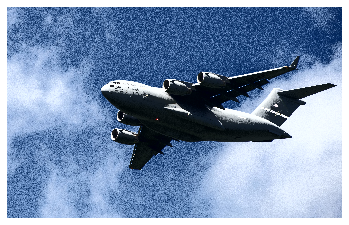

In [54]:
# 컬러 이미지의 경우 이미지를 YUV 컬러 포맷으로 변환후 equalizeHist 적용가능. 그 후 BGR을 RGB로 변환

image_bgr = cv2.imread('images/plane.jpg')

# YUV로 바꿉니다.
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# 히스토그랩 평활화 적용
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

# RGB로 바꿉니다.
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

plt.imshow(image_rgb); plt.axis('off')
plt.show()

히스토그램 평활화는 데이터의 시각적 표현일 뿐이기 때문에 종종 현실 이미지 처럼 보이지는 않음.  
잘 적용될 경우 관심대상을 다른 객체나 배경과 잘 구분되도록 contrast를 올려줌

#### 8. 색깔 구분하기

색 범위를 정의하고 이미지에 inRange() 함수로 mask 적용  
__HSV__ : 색상(Hue), 채도(Saturation), 명도(Value)

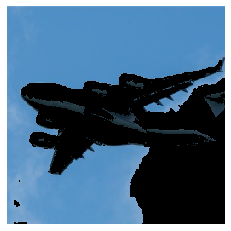

In [55]:
image_bgr = cv2.imread('images/plane_256x256.jpg')

# BGR에서 HSV로 변환합니다.
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# HSV에서 파랑 값의 범위를 정의합니다.
lower_blue = np.array([50, 100, 50])
upper_blue = np.array([130, 255, 255])

# 마스크를 만듭니다.
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# 이미지에 마스크를 적용합니다.
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask = mask)

# BGR에서 RGB로 변환합니다.
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb); plt.axis('off')
plt.show()

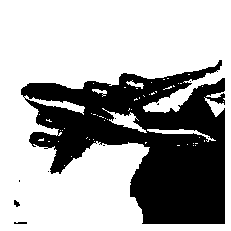

In [56]:
# 마스크 출력
plt.imshow(mask, cmap = 'gray'); plt.axis('off')
plt.show()

#### 9. 이미지 이진화하기

__이미지 이진화__ : 특정값보다 큰 값을 가진 픽셀은 흰색, 작은 값을 가진 픽셀은 검은색으로 만드는 과정  
__적응적 이진화__ : 이미지 이진화에서 좀 더 나아가 주변 필셀의 강도에 의해 픽셀의 임계값이 정해지는 이진화  

이진화는 주로 인쇄물을 찍은 사진에서 글자를 분리해내기 위해 자주 사용

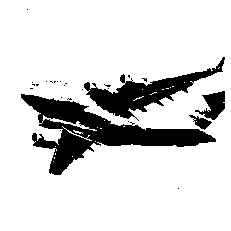

In [57]:
image_grey = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 적응적 이진화를 적용합니다.
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,                 # 출력 필셀 강도의 최대값을 결정
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,   # 픽셀의 임곗값을 주변 픽셀 강도의 가중치 합으로 설정, 가우시안이 아닌 주변픽셀의 평균을 임계값으로 설정 할 수도 있음
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,                # 픽셀의 임곗값 결정에 사용하는 주변 영역 크기
                                        subtract_from_mean)               # 계산된 임곗값에서 뺄 상수

plt.imshow(image_binarized, cmap = 'gray'); plt.axis('off')
plt.show()

#### 10 배경 제거하기

원하는 전경 주위에 사각형 박스를 그리고 grabCut 알고리즘 실행

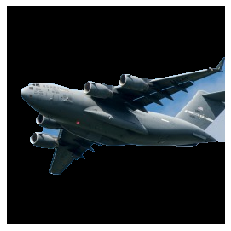

In [58]:
# 이미지를 로드하고 RGB로 변환
image_bgr = cv2.imread('images/plane_256x256.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 사각형 좌표 : 시작점의 x좌표, y좌표, 너비, 높이

rectangle = (0,56,256,150)

mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열을 만듭니다.
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut을 실행합니다.
cv2.grabCut(image_rgb,   # 원본이미지
            mask,        # 마스크
            rectangle,   # 사각형
            bgdModel,    # 배경을 위한 임시 배열
            fgdModel,    # 전경을 위한 임시 배열
            5,           # 반복횟수
            cv2.GC_INIT_WITH_RECT)   # 사각형을 사용한 초기화

# 배경인 곳은 0, 그외에는 1로 설정한 마스크를 만듭니다.
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱해 배경을 제외합니다.
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

plt.imshow(image_rgb_nobg); plt.axis('off')
plt.show()

그랩컷으로 이미지를 배경으로부터 분리해낸 후 분리되지 않은 부분을 다시 배경으로 지정해서 삭제하는 것도 가능  
하지만 다수의 사진을 일일이 분리하는 것은 불가능하므로 __어느정도의 오류는 수용할 것__  

그랩컷은 우선 전경이 들어있는 영역을 대략적으로 지정하면 __그 밖의 모든 것을 배경이라고 가정__ 하고 사각형 안에있는 배경을 찾아 배경과 전경을 구분하는 마스크를 만드는 알고리즘

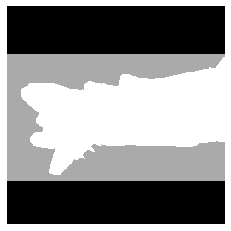

In [59]:
# 마스크를 출력합니다.
plt.imshow(mask, cmap = 'gray'); plt.axis('off')
plt.show()

마스크에서 검은 영역은 미리 설정해놓은 배경의 영역, 회색영역은 그랩컷 알고리즘이 배경이라고 생각하는 영역, 흰색영역은 전경

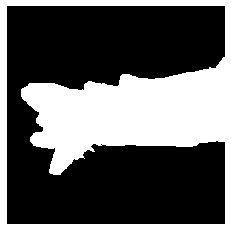

In [60]:
# 검은색과 회색영역을 합친 두번째 마스크 출력
plt.imshow(mask_2, cmap = 'gray'); plt.axis('off')
plt.show()

#### 11. 경계선 감지하기

캐니 경계선 감지기를 사용합니다.

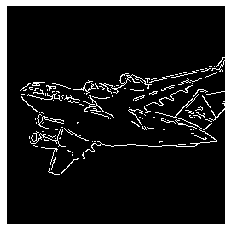

In [61]:
image_gray = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산합니다.
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임곗값으로 지정합니다.
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# 캐니 경계선 감지기를 적용합니다.
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap = 'gray'); plt.axis('off')
plt.show()

경계선 감지기술은 정보가 적은 하늘과 같은 영역은 제거하고, 하늘과 비행기가 만나는 경계선 같은 지점만 반환  

경계선 감지 기법은 캐니 이외에도 소벨필터, 라플라시안 경계선 감지기 등을 사용  

캐니 경계선 감지기의 주요 파라미터는 __낮은 임곗값과 높은 임곗값.__  
-> 값에 따라 경계 감지의 성능이 달려있으므로 사전에 소수의 이미지로 임곗값을 실험해본 후 알고리즘을 짜는 것이 좋음

#### 12. 모서리 감지하기

OpenCV의 cornerHarris()함수로 해리스 모서리 감지를 활용

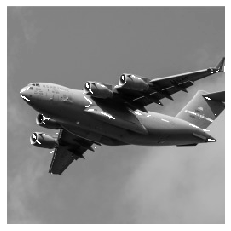

In [62]:
image_bgr = cv2.imread('images/plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# 모서리 감지 매개변수를 설정합니다.
block_size = 2
aperture = 29
free_parameter = 0.04

# 모서리를 감지합니다.
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

# 모서리 표시를 부각시킵니다.
detetor_responses = cv2.dilate(detector_responses, None)

# 임곗값보다 큰 감지 결과만 남기고 흰색으로 표시합니다.
threshold = 0.02

image_bgr[detector_responses > threshold * detector_responses.max()] = [255,255,255]

# 흑백으로 변환합니다.
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap='gray'); plt.axis('off')
plt.show()

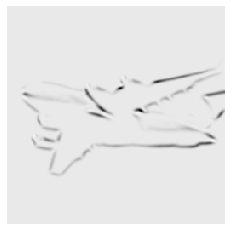

In [63]:
# 가능성이 높은 모서리를 출력합니다.
plt.imshow(detector_responses, cmap='gray'); plt.axis('off')
plt.show()

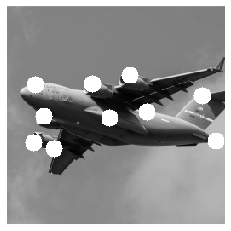

In [64]:
# goodFeaturesToTrack() : Shi-Tomasi 모서리감지기, 뚜렷하게 나타난 모서리를 지정된 개수만큼 찾아냄

image_bgr = cv2.imread('images/plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 감지할 모서리 개수
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

# 모서리를 감지합니다.
corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance)

corners = np.float32(corners)

# 모서리마다 흰 원을 그립니다.
for corner in corners:
    x,y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)
    
# 흑백 이미지로 변환합니다.
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 이미지를 출력합니다.
plt.imshow(image_rgb, cmap = 'gray'); plt.axis('off')
plt.show()

#### 13. 머신러닝 특성 만들기

이미지를 머신러닝에 피요한 샘플로 변환하기 위해서는 flatten() 메서드를 사용하여 다차원 배열을 샘플값이 담긴 벡터로 변환해야함

In [65]:
image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지를 10x10 픽셀 크기로 변환합니다.
image_10x10 = cv2.resize(image, (10,10))

# 이미지 데이터를 1차원 벡터로 변환합니다.
image_10x10.flatten()

array([133, 130, 130, 129, 130, 129, 129, 128, 128, 127, 135, 131, 131,
       131, 130, 130, 129, 128, 128, 128, 134, 132, 131, 131, 130, 129,
       129, 128, 130, 133, 132, 158, 130, 133, 130,  46,  97,  26, 132,
       143, 141,  36,  54,  91,   9,   9,  49, 144, 179,  41, 142,  95,
        32,  36,  29,  43, 113, 141, 179, 187, 141, 124,  26,  25, 132,
       135, 151, 175, 174, 184, 143, 151,  38, 133, 134, 139, 174, 177,
       169, 174, 155, 141, 135, 137, 137, 152, 169, 168, 168, 179, 152,
       139, 136, 135, 137, 143, 159, 166, 171, 175], dtype=uint8)

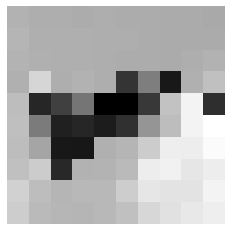

In [66]:
plt.imshow(image_10x10, cmap = 'gray'); plt.axis('off')
plt.show()

In [67]:
print(image_10x10.shape)
print(image_10x10.flatten().shape)

(10, 10)
(100,)


여기에서 만든 특성 데이터는 다른 이미지에서 얻은 벡터와 연결하여 머신러닝 알고리즘에 주입할 데이터를 만듬

흑백과 달리 컬러 이미지는 RGB등을 나타내는 각 value가 합쳐져서 픽셀의 최종색을 만들기 때문에 흑백 데이터에 비해 size가 3배

In [68]:
image_color = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_COLOR)

# 이미지를 10x10 픽셀 크기로 변환합니다.
image_color_10x10 = cv2.resize(image_color, (10, 10))

image_color_10x10.flatten().shape

(300,)

컴퓨터 비전의 가장 큰 문제점 : 이미지가 커질수록 __특성의 개수가 커져서__ 분석 시간이 너무 오래걸림  
-> 데이터에 있는 정보량의 손실을 최소화하면서 특성의 개수를 줄이는 것! : __차원축소__ 의 필요성

In [69]:
# 흑백 이미지

image_256x256_gray = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)
# 이미지 데이터를 1차언 벡터로 변환하고 차원을 출력합니다.
print(image_256x256_gray.flatten().shape)

image_256x256_color = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_COLOR)
print(image_256x256_color.flatten().shape)

(65536,)
(196608,)


#### 14. 평균 색을 특성으로 인코딩하기

일반적으로 컬러 한 픽셀은 3개의 채널(RGB값)으로 표현  
이떄 모든 빨강채널, 초록채널, 파랑 채널의 평균값을 계산하여 이미지의 평균 컬러를 나타내는 특성을 만듬  
컬러를 기반하여 이미지를 분류하는 데 사용.

In [70]:
image_bgr = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_COLOR)

channels = cv2.mean(image_bgr)
# B G R 값의 평균을 나타냅니다.
print(channels)

# BGR을 RGB로 바꿉니다.
observation = np.array([(channels[2], channels[1], channels[0])])

# R G B 값의 평균을 나타냅니다.
observation

(169.0235595703125, 133.11940002441406, 90.52377319335938, 0.0)


array([[ 90.52377319, 133.11940002, 169.02355957]])

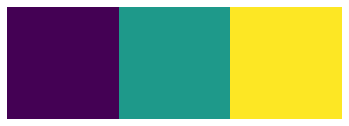

In [71]:
# 채널 평균값을 시각화합니다.

plt.imshow(observation); plt.axis('off')
plt.show()

#### 15. 컬러 히스토그램을 특성으로 인코딩하기

각 컬러 채널에 대해 히스토그램을 계산

In [76]:
image_bgr = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_COLOR)

# RGB로 변환합니다.
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 특성값을 담을 리스트를 만듭니다.
features = []

# 각 컬러 채널에 대해 히스토그램을 계산합니다.
colors = ('r', 'g', 'b')

# 각 컬러 채널을 반복하면서 히스토그램을 계산하고 리스트에 추가합니다.
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],   # 이미지 변수
                             [i],           # 채널 인덱스
                             None,          # 마스크 없음
                             [256],         # 히스토그램 크기
                             [0, 256])      # 범위
    features.extend(histogram)
    
# 샘플의 특성값으로 벡터를 만듭니다.
observation = np.array(features).flatten()
observation[:5]

array([1027.,  217.,  182.,  146.,  146.], dtype=float32)

In [77]:
# RGB 컬러 구조에서 각 컬러는 세개의 컬러채널(RGB)의 조합

# 맨 왼쪽위 픽셀은 R(107), G(163), B(212)값을 가짐
image_rgb[0,0]

array([107, 163, 212], dtype=uint8)

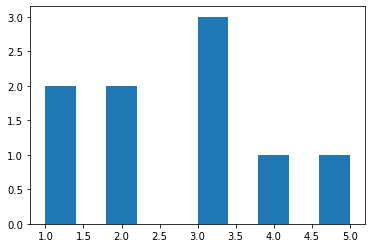

In [81]:
import pandas as pd

# 히스토그램은 데이터에서 값의 분포를 나타내는 도표
# 히스토그램의 예시
data = pd.Series([1,1,2,2,3,3,3,4,5])

# 히스토그램을 출력합니다.
data.hist(grid = False)
plt.show()

각 컬러 채널을 히스토그램으로 표현한다면 x축은 0~255 사이의 채널값, y축은 이미지의 모든 픽셀에서 나타난 특정 채널값의 횟수

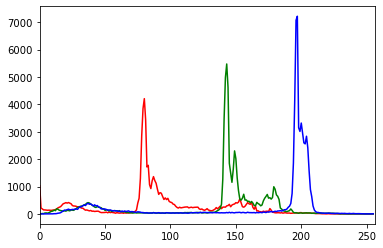

In [82]:
colors = ('r', 'g', 'b')

for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],   # 이미지
                             [i],           # 채널 인덱스
                             None,          # 마스크 없음
                             [256],         # 히스토그램 크기
                             [0,256])       # 범위
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])
    
plt.show()